In [41]:
import pandas as pd
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


In [21]:
df = pd.read_csv("final_vocab.csv")
df.head()

,PMID,Title,Verbatim Definition,Definition A,Definition B,Definition C,Definition D,Definition E,published_year,study_year,definitions
0,35589549,Identifying who has long COVID in the USA: a m...,"However, three N3C sites provided lists of loc...",NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2022,NaN,"Visit to Long COVID Clinic, , ,"
1,36415203,Vital Measurements of Hospitalized COVID-19 Pa...,"Due to limited documentation of Long COVID, we...",NaN,NaN,NaN,Computaional Phenotype Model based on U09.9 in...,NaN,2022,NaN,Computaional Phenotype Model based on U09.9 in...
2,36563487,Generalisable long COVID subtypes: findings fr...,Patients with U09.9 (Long COVID) diagnosis,ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,"The data freeze date was August 10, 2022","ICD-10 : U09.9 , , ,"
3,36793086,Coding long COVID: characterizing a new diseas...,"In this retrospective cohort study, we defined...",ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,NaN,"ICD-10 : U09.9 , Date , ,"
4,3716633,Risk of post-acute sequelae of SARS-CoV-2 infe...,Adult patients with all of the following withi...,NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2023,2020/03/01 - 2022/02/28,"Visit to Long COVID Clinic, , ,"


In [13]:
df.dtypes

PMID                      int64
Title                    object
Verbatim Definition      object
Definition A             object
Definition B             object
Definiion C              object
Definiion D             float64
published_year            int64
study_year               object
definitions              object
dtype: object

In [24]:
df["definitions"] = df["Definition A"].fillna('') + ', ' + df["Definition B"].fillna('') + ', '+df["Definition C"].fillna('') + ', '+df["Definition D"].fillna('')+', '+df["Definition E"].fillna('')
df.head()

,PMID,Title,Verbatim Definition,Definition A,Definition B,Definition C,Definition D,Definition E,published_year,study_year,definitions
0,35589549,Identifying who has long COVID in the USA: a m...,"However, three N3C sites provided lists of loc...",NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2022,NaN,", , Visit to Long COVID Clinic, ,"
1,36415203,Vital Measurements of Hospitalized COVID-19 Pa...,"Due to limited documentation of Long COVID, we...",NaN,NaN,NaN,Computaional Phenotype Model based on U09.9 in...,NaN,2022,NaN,", , , Computaional Phenotype Model based on U0..."
2,36563487,Generalisable long COVID subtypes: findings fr...,Patients with U09.9 (Long COVID) diagnosis,ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,"The data freeze date was August 10, 2022","ICD-10 : U09.9 , , , ,"
3,36793086,Coding long COVID: characterizing a new diseas...,"In this retrospective cohort study, we defined...",ICD-10 : U09.9,NaN,NaN,NaN,NaN,2023,NaN,"ICD-10 : U09.9 , , , ,"
4,3716633,Risk of post-acute sequelae of SARS-CoV-2 infe...,Adult patients with all of the following withi...,NaN,NaN,Visit to Long COVID Clinic,NaN,NaN,2023,2020/03/01 - 2022/02/28,", , Visit to Long COVID Clinic, ,"


In [30]:
profile = ProfileReport(df, title ='EDA on Vocab Data')

In [31]:
profile.to_file('eda.html')

Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 482.83it/s]


In [28]:
wordcloud = WordCloud().generate(str(df["definitions"]))

In [29]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png')

In [42]:
df["definitions"].value_counts()

definitions
ICD-10 : U09.9 , , , ,                                                          8
ICD-10 : U09.9 , ICD-10 : B94.8, , ,                                            4
, , Visit to Long COVID Clinic, ,                                               2
, , , Computaional Phenotype Model based on U09.9 indicator,                    2
ICD-10 : U09.9 , ICD-10 : B94.8, Visit to Long COVID Clinic, ,                  2
ICD-10 : U09.9 , , Visit to Long COVID Clinic, ,                                1
ICD-10 : U09.9 , , , Computaional Phenotype Model based on U09.9 indicator,     1
, , , , NLP on EHR reports                                                      1
Name: count, dtype: int64

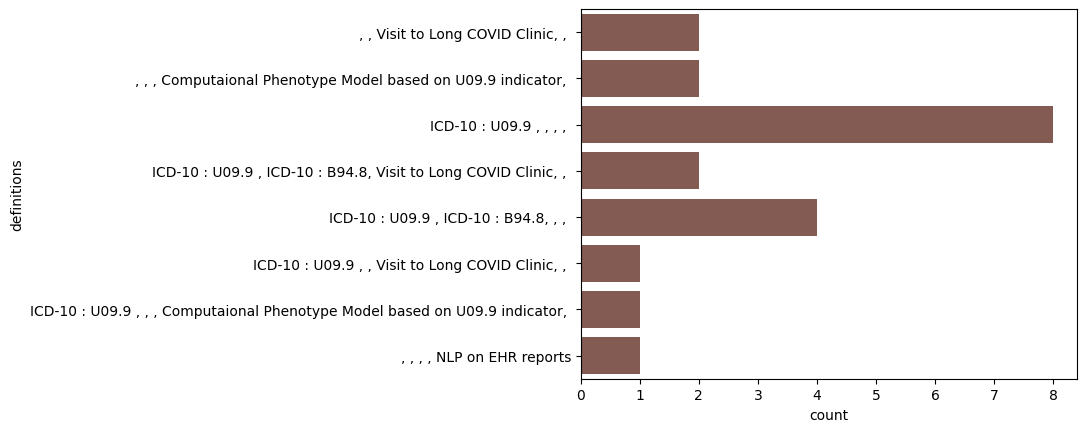

In [40]:
sns.countplot(df["definitions"])
plt.show()

In [ ]:
defin